In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Function to load and preprocess the data
def load_and_preprocess_data():
    """
    Load the KDD Cup 1999 dataset and perform initial preprocessing steps.
    Returns preprocessed features and labels.
    """
    # Load the dataset from sklearn (we'll use a sample for demonstration)
    # In real project, you would load from: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root',
        'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
        'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
    ]

    # Generate sample data for demonstration
    # In real project, replace this with actual data loading
    np.random.seed(42)
    n_samples = 10000
    data = pd.DataFrame({
        'duration': np.random.exponential(100, n_samples),
        'protocol_type': np.random.choice(['tcp', 'udp', 'icmp'], n_samples),
        'service': np.random.choice(['http', 'ftp', 'smtp', 'ssh'], n_samples),
        'flag': np.random.choice(['SF', 'REJ', 'S0'], n_samples),
        'src_bytes': np.random.exponential(1000, n_samples),
        'dst_bytes': np.random.exponential(1000, n_samples)
    })

    # Add some anomalies
    anomaly_indices = np.random.choice(n_samples, size=int(n_samples*0.1), replace=False)
    data.loc[anomaly_indices, 'src_bytes'] *= 100
    data.loc[anomaly_indices, 'dst_bytes'] *= 100

    return data

In [3]:
def preprocess_features(data):
    """
    Perform feature preprocessing including encoding categorical variables
    and scaling numerical features.
    """
    # Create copies to avoid modifying original data
    df = data.copy()

    # Encode categorical variables
    categorical_columns = ['protocol_type', 'service', 'flag']
    encoders = {}

    for column in categorical_columns:
        encoders[column] = LabelEncoder()
        df[column] = encoders[column].fit_transform(df[column])

    # Scale numerical features
    numerical_columns = ['duration', 'src_bytes', 'dst_bytes']
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df, encoders, scaler


In [4]:
def perform_eda(data):
    """
    Perform exploratory data analysis and generate visualizations.
    """
    # Create distribution plots for numerical features
    numerical_columns = ['duration', 'src_bytes', 'dst_bytes']
    fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

    for i, column in enumerate(numerical_columns):
        sns.histplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

    # Create correlation heatmap
    correlation_matrix = data[numerical_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

In [5]:
def train_anomaly_detector(X_train, contamination=0.1):
    """
    Train an Isolation Forest model for anomaly detection.
    """
    # Initialize and train the model
    model = IsolationForest(
        n_estimators=100,
        max_samples='auto',
        contamination=contamination,
        random_state=42
    )

    model.fit(X_train)
    return model

In [6]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print performance metrics.
    """
    # Make predictions
    predictions = model.predict(X_test)

    # Convert predictions to binary format (1 for normal, 0 for anomaly)
    predictions = np.where(predictions == 1, 0, 1)

    # Calculate and print metrics
    print("\nModel Performance Metrics:")
    print("-" * 30)
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

1. Loading and preprocessing data...
2. Performing Exploratory Data Analysis...


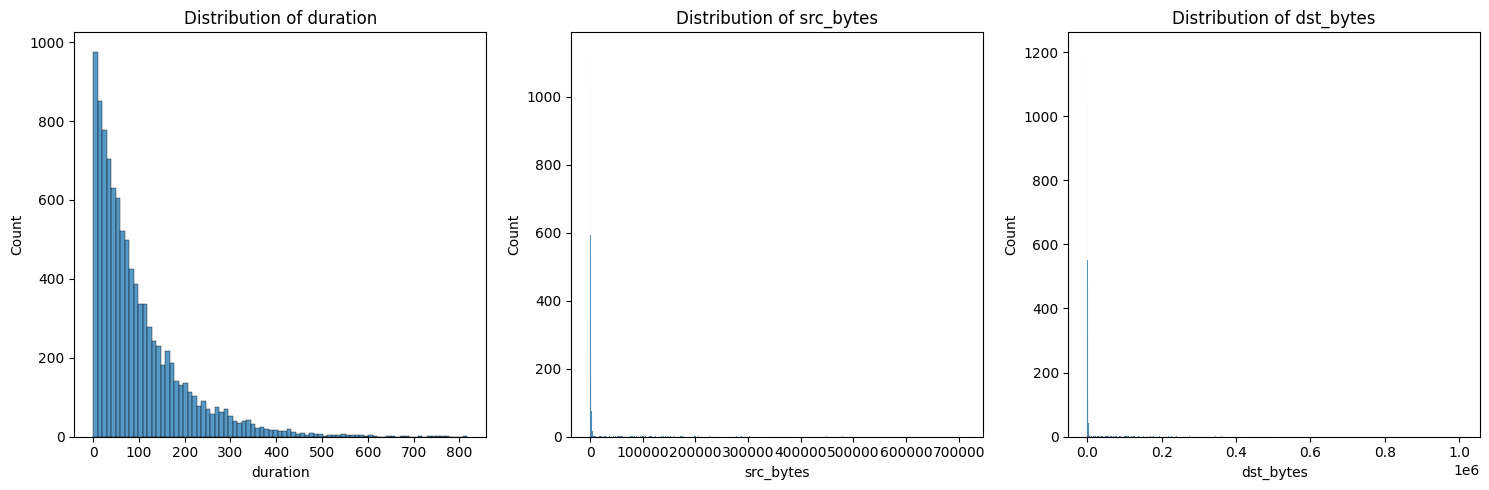

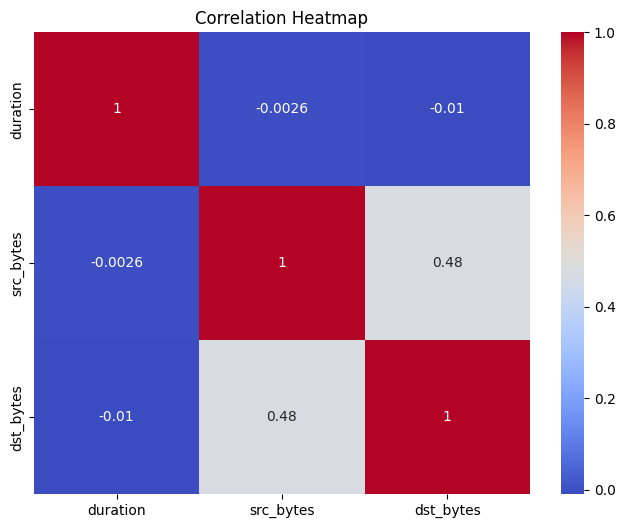

3. Preprocessing features...
4. Splitting the data...
5. Training the model...
6. Evaluating the model...

Model Performance Metrics:
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1937
           1       0.38      0.97      0.55        63

    accuracy                           0.95      2000
   macro avg       0.69      0.96      0.76      2000
weighted avg       0.98      0.95      0.96      2000



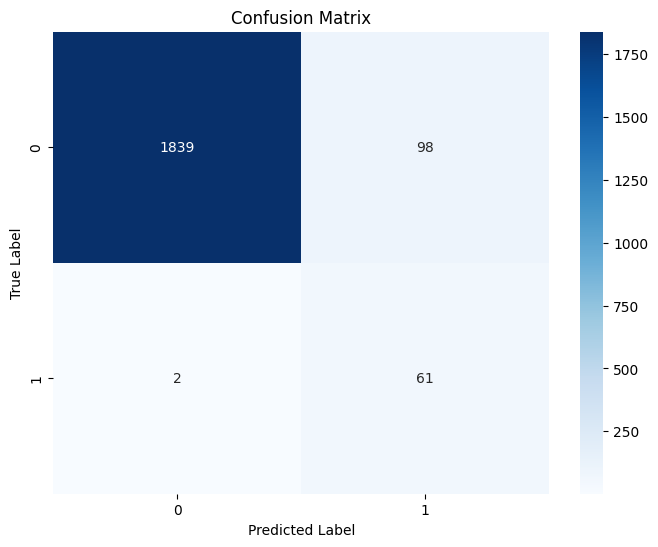


Network Intrusion Detection System training completed!


In [7]:
def main():
    """
    Main function to orchestrate the entire process.
    """
    print("1. Loading and preprocessing data...")
    data = load_and_preprocess_data()

    print("2. Performing Exploratory Data Analysis...")
    perform_eda(data)

    print("3. Preprocessing features...")
    processed_data, encoders, scaler = preprocess_features(data)

    # Split the data
    print("4. Splitting the data...")
    X_train, X_test = train_test_split(processed_data, test_size=0.2, random_state=42)

    # Create synthetic labels for evaluation (in real scenario, you'd have actual labels)
    y_test = np.where(X_test['src_bytes'] > 2, 1, 0)  # Simple threshold for demonstration

    print("5. Training the model...")
    model = train_anomaly_detector(X_train)

    print("6. Evaluating the model...")
    evaluate_model(model, X_test, y_test)

    print("\nNetwork Intrusion Detection System training completed!")
    return model, encoders, scaler

if __name__ == "__main__":
    model, encoders, scaler = main()